# Introduction
This project focuses on developing a machine learning model for Zyfra, a company that specializes in creating solutions for the heavy industry sector. The goal of the model is to estimate the amount of gold that can be recovered from a gold mine.

The main objective of the project is to enhance gold yield by avoiding unprofitable parameter settings. To achieve this, I will analyze the data related to the gold extraction and purification process.

The project will follow these key steps:
1. **Prepare the data**
2. **Perform data analysis**
3. **Develop and train the machine learning model**

The data is stored in three files:
- `gold_recovery_train.csv`
- `gold_recovery_test.csv`
- `gold_recovery_full.csv`

## Prepare the data

### Open the Files and Look into the Data

In [100]:
# load libraries
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [16]:
# Load data
train = pd.read_csv("../Data/gold_recovery_train.csv")
test = pd.read_csv("../Data/gold_recovery_test.csv")
full = pd.read_csv("../Data/gold_recovery_full.csv")

In [17]:
# look into the train data
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [18]:
# look into the test data
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [19]:
# look into the full data
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.

In [20]:
# Define recovery calculation function
def calculate_recovery(C, F, T):
    x = C * (F - T)
    y = F * (C - T)
    return 100 * x / y 

valid_train = train.dropna() 

C = valid_train['rougher.output.concentrate_au']
F = valid_train['rougher.input.feed_au']
T = valid_train['rougher.output.tail_au']

# Calculate recovery using list comprehension on valid rows
calculated_recovery = pd.Series(
    [calculate_recovery(c, f, t) 
     for c, f, t in zip (C, F, T)])


# Get actual recovery from valid rows
actual_recovery = valid_train['rougher.output.recovery']

# Compute MAE
mae = mean_absolute_error(actual_recovery, calculated_recovery)

# Output MAE and findings
print(f"Mean Absolute Error between provided and calculated recovery: {mae}")

Mean Absolute Error between provided and calculated recovery: 1.0868072651623353e-14


Since the difference between provided and calculated recovery is low, it is a good sign. Therefore, we can say that the rougher.output.recovery feature is calculated correctly.

### Analyze the features not available in the test set. What are these parameters? What is their type?

In [21]:
missing_columns = sorted(set(train.columns) - set(test.columns))
print(f"{missing_columns}\n") 
print(f"The number of missing_columns are {len(missing_columns)}\n")
print("The missing_columns belong to following dtypes:\n")
print(train[missing_columns].dtypes)

['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_au', 'rougher.output.tail_pb', 'rougher.output.tail

There are 34 features present in the training set but absent in the test set: These parameters represent outputs and intermediate calculations from the gold recovery process. They all belong to float64.

### Perform data preprocessing

In [22]:
# Get info on train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


There are 16860 rows and 87 columns in this train data. Except the date column, all other columns are float64. It is better to change date column into datetime format.

In [23]:
# change date column into datetime
train['date'] = pd.to_datetime(train['date'])

In [24]:
# confirm change
print(train['date'].dtype)

datetime64[ns]


In [25]:
# check null values
train.isnull().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

It is clear that there are null values in this data. It is mentioned in the question that the data is indexed by the date and time of acquisition (the date feature). Parameters that are close to each other in time are often similar. Therefore, I do not need to remove the missing values — I can infer them. In this case, the best approach is to use forward fill.

In [26]:
# # fill missing values
# train = train.fillna(method= 'ffill')

In [27]:
# fill missing values
train = train.ffill()

In [31]:
# check if there are missing values
print(train.isnull().sum().any())

False


In [30]:
# check duplicates
print(train.duplicated().sum())

0


No duplicates found.

In [32]:
# Get info on test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

There are 5,856 rows and 53 columns in this train data. Except for the date column, all other columns are of type float64. It is better to convert the date column into datetime format. It turns out that this data has fewer columns than the train data. What we need is the same number of columns in both the train and test data. I will address this issue later.

In [33]:
# change date column into datetime
test['date'] = pd.to_datetime(test['date'])

In [34]:
# confirm change
print(test['date'].dtype)

datetime64[ns]


In [35]:
# check null values
test.isnull().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


It is clear that there are null values in this data. As mentioned previously, I can infer the missing values. In this case, the best approach is to use forward fill.

In [36]:
# Fill missing values
test = test.ffill()


In [38]:
# check if there are missing values
print(test.isnull().sum().any())

False


In [40]:
# check duplicates
print(test.duplicated().sum())

0


No duplicates found.

In [41]:
# Get info on full data
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


There are 22,716 rows and 87 columns in this train data. Except for the date column, all other columns are of type float64. It is better to convert the date column into datetime format.

In [42]:
# change date column into datetime
full['date'] = pd.to_datetime(full['date'])

In [43]:
#confirm change
print(full['date'].dtype)

datetime64[ns]


In [44]:
# check null values
full.isnull().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

It is clear that there are null values in this data. As mentioned previously, I can infer the missing values. In this case, the best approach is to use forward fill.

In [45]:
#fill missing values
full = full.ffill()

In [47]:
# check missing values
print(full.isnull().sum().any())

False


In [49]:
# check duplicates
print(full.duplicated().sum())

0


No duplicates found

## Analyze the data

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage

In [50]:
# For gold (Au)
concentrate_au = full[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au',
                      'final.output.concentrate_au']]

In [51]:
# Examine few rows
concentrate_au.head(2)

,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,19.793808,34.174427,42.192020
1,20.050975,34.118526,42.701629


The column names seem too long. Let's make them shorter.

In [52]:
concentrate_au.columns = ['rough','primary','final']

In [53]:
# confirm column names
concentrate_au.head(2)

,rough,primary,final
0,19.793808,34.174427,42.192020
1,20.050975,34.118526,42.701629


In [54]:
# Lets change this dataframe into longformat so that I can make boxplot
concentrate_au_long = concentrate_au.melt(var_name='Purity', value_name='Au Concentration')

In [55]:
# Examine few rows
concentrate_au_long.sample(5)

,Purity,Au Concentration
62163,final,39.903625
43974,primary,33.224357
12384,rough,20.720442
49936,final,46.995655
16236,rough,22.014285


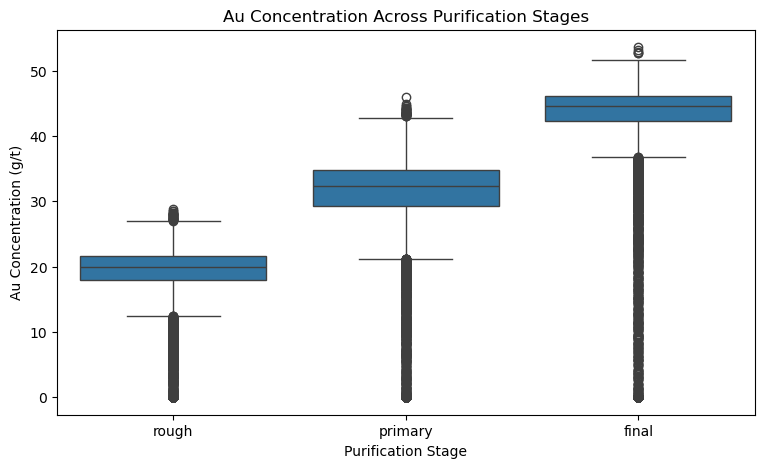

In [56]:
# Create box plot
plt.figure(figsize=(9, 5))
sns.boxplot(data=concentrate_au_long, x='Purity', y='Au Concentration')
plt.title('Au Concentration Across Purification Stages')
plt.xlabel('Purification Stage')
plt.ylabel('Au Concentration (g/t)')

# Show plot
plt.show()

It is clear that the concentration of gold increases at each purification stage. The concentration is highest at the final stage. I believe this is the expected trend.

In [57]:
# For Ag
concentrate_ag = full[['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag',
                      'final.output.concentrate_ag']]

In [58]:
# Examine few rows
concentrate_ag.head(2)

,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,11.500771,8.547551,6.055403
1,11.615865,8.558743,6.029369


The column names seem too long. Let's make them shorter.

In [59]:
# change column names
concentrate_ag.columns = ['rough','primary','final']

In [60]:
# confirm changes made
concentrate_ag.head(2)

,rough,primary,final
0,11.500771,8.547551,6.055403
1,11.615865,8.558743,6.029369


In [61]:
# Lets change this dataframe into longformat so that I can make boxplot
concentrate_ag_long = concentrate_ag.melt(var_name='Process', value_name='Ag Concentration')

In [62]:
# examine few rows
concentrate_ag_long.sample(5)

,Process,Ag Concentration
45406,primary,8.971777
58022,final,4.740860
43683,primary,5.574234
57041,final,0.000000
36673,primary,8.888326


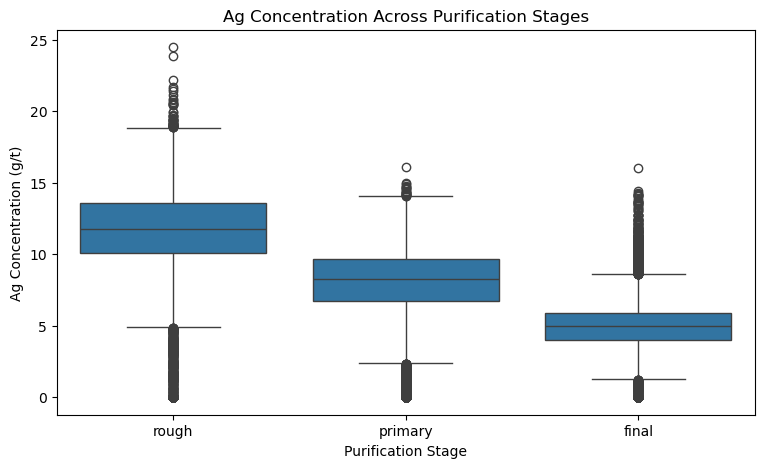

In [63]:
# Create box plot 
plt.figure(figsize=(9, 5))
sns.boxplot(data=concentrate_ag_long, x='Process', y='Ag Concentration')
plt.title('Ag Concentration Across Purification Stages')
plt.xlabel('Purification Stage')
plt.ylabel('Ag Concentration (g/t)')

# Show plot
plt.show()

It is clear that the concentration of Ag decreases at each stage. This is a good sign because we want fewer impurities at the final stage.

In [64]:
# For pb
concentrate_pb = full[['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb',
                      'final.output.concentrate_pb']]

In [66]:
# Examine few rows
concentrate_pb.head(2)

,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,7.101074,10.389648,9.889648
1,7.278807,10.497069,9.968944


In [67]:
# change column names
concentrate_pb.columns = ['rough','primary','final']

In [68]:
# confirm change
concentrate_pb.head(2)

,rough,primary,final
0,7.101074,10.389648,9.889648
1,7.278807,10.497069,9.968944


In [69]:
# Lets change this dataframe into longformat so that I can make boxplot
concentrate_pb_long = concentrate_pb.melt(var_name='Process', value_name='Pb Concentration')

In [70]:
# examine few rows
concentrate_pb_long.sample(5)

,Process,Pb Concentration
32031,primary,11.448529
2038,rough,0.000000
5613,rough,0.000000
10621,rough,8.032010
22671,rough,11.103838


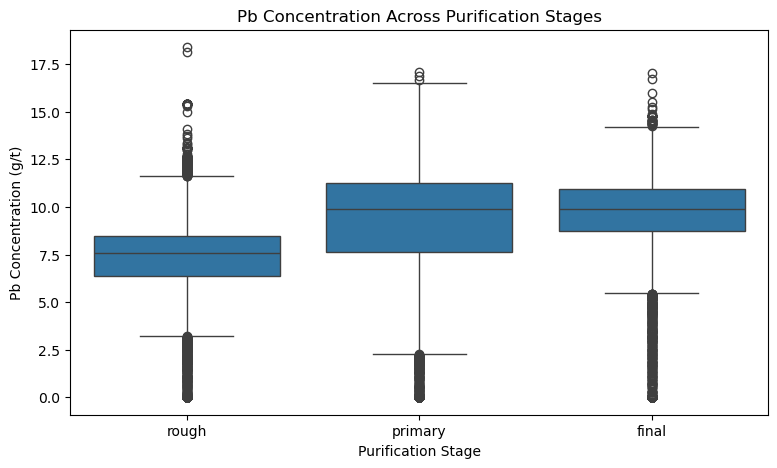

In [71]:
# Create box plot 
plt.figure(figsize=(9, 5))
sns.boxplot(data=concentrate_pb_long, x='Process', y='Pb Concentration')
plt.title('Pb Concentration Across Purification Stages')
plt.xlabel('Purification Stage')
plt.ylabel('Pb Concentration (g/t)')

# Show plot
plt.show()

It seems there is a slight increase in Pb concentration from rough to primary. After that, there is no clear increasing or decreasing trend like the one I saw with gold and silver.

###  Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

In [72]:
# When exploring feed particle size distribution, we have to look into two types of feed feed.
# 1. primary_cleaner.input.feed_size
# 2. rougher.input.feed.size

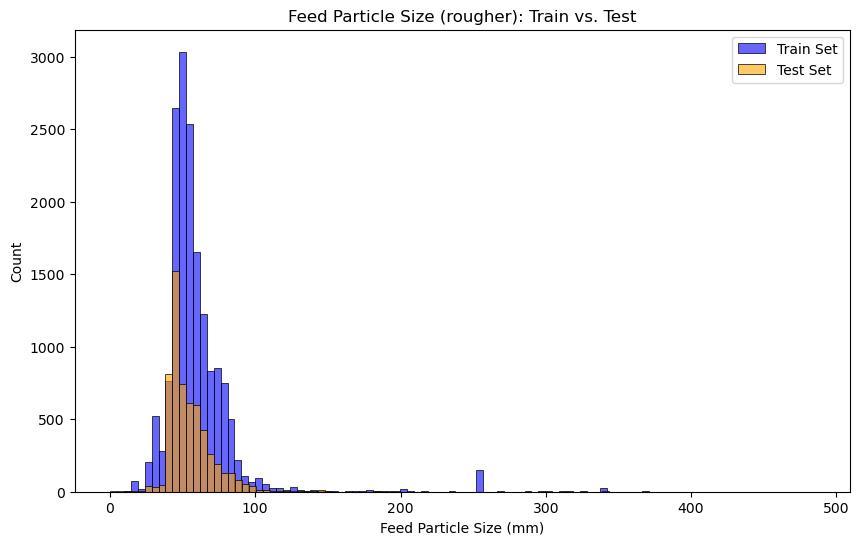

In [73]:
## rougher.input.feed.size
# Extract feed size
train_feed_rougher = train['rougher.input.feed_size']
test_feed_rougher = test['rougher.input.feed_size']

# Create a histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(train_feed_rougher, bins=100, alpha=0.6,color = 'blue', label='Train Set')
sns.histplot(test_feed_rougher, bins=100, alpha=0.6, color = 'orange', label='Test Set')
plt.xlabel('Feed Particle Size (mm)')
plt.title('Feed Particle Size (rougher): Train vs. Test')
plt.legend(loc='upper right')

# Show plot
plt.show()

The distribution is similar; however, the counts are different, which is expected since the training data is larger than the test data.

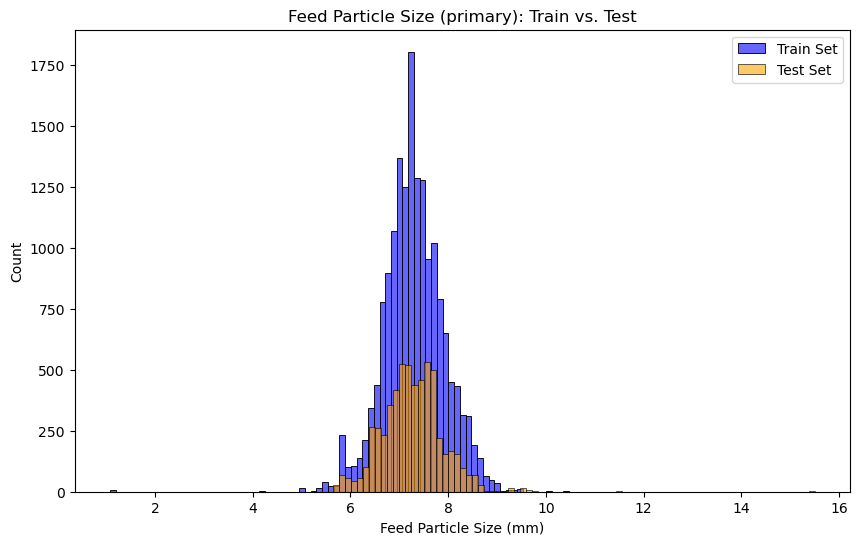

In [74]:
# primary_cleaner.input.feed_size

# Extract feed size
train_feed_primary = train['primary_cleaner.input.feed_size']
test_feed_primary = test['primary_cleaner.input.feed_size']

# Create a histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(train_feed_primary, bins=80, alpha=0.6,color = 'blue', label='Train Set')
sns.histplot(test_feed_primary, bins=80, alpha=0.6, color = 'orange', label='Test Set')
plt.xlabel('Feed Particle Size (mm)')
plt.title('Feed Particle Size (primary): Train vs. Test')
plt.legend(loc='upper right')

# Show plot
plt.show()

The distribution is similar; however, the counts are different, which is expected since the training dataset is larger than the test dataset. Therefore, we can conclude that the particle size distributions in both sets are representative of the overall data.

### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

In [75]:
# Calculate total concentrations
full['feed_total'] = full[['rougher.input.feed_au', 'rougher.input.feed_ag', 
                           'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1)
full['rougher_total'] = full[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 
                              'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']].sum(axis=1)
full['final_total'] = full[['final.output.concentrate_au', 'final.output.concentrate_ag', 
                            'final.output.concentrate_pb', 'final.output.concentrate_sol']].sum(axis=1)

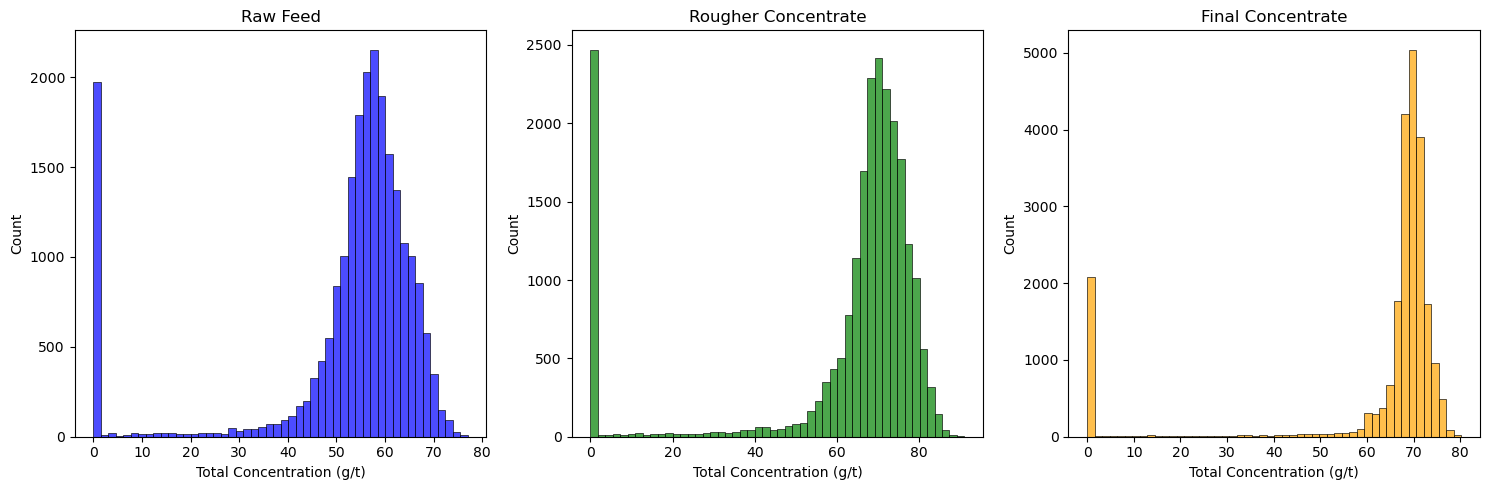

In [76]:
#Set up figure for separate histograms
plt.figure(figsize=(15, 5))

# Raw Feed histogram
plt.subplot(1, 3, 1)
sns.histplot(full['feed_total'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Total Concentration (g/t)')
plt.ylabel('Count')
plt.title('Raw Feed')

# Rougher Concentrate histogram
plt.subplot(1, 3, 2)
sns.histplot(full['rougher_total'], bins=50, color='green', alpha=0.7)
plt.xlabel('Total Concentration (g/t)')
plt.title('Rougher Concentrate')

# Final Concentrate histogram
plt.subplot(1, 3, 3)
sns.histplot(full['final_total'], bins=50, color='orange', alpha=0.7)
plt.xlabel('Total Concentration (g/t)')
plt.title('Final Concentrate')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

From the histograms it seems there are many counts whose concentration is zero. let's check.

In [77]:
# Step 1: Check how many rows have 0 in each total column
zero_counts = {
    'feed_total': (full['feed_total'] == 0).sum(),
    'rougher_total': (full['rougher_total'] == 0).sum(),
    'final_total': (full['final_total'] == 0).sum()
}

print("Number of rows with zero total concentration:")
for col, count in zero_counts.items():
    print(f"  {col}: {count} rows")

Number of rows with zero total concentration:
  feed_total: 1584 rows
  rougher_total: 2009 rows
  final_total: 1671 rows


Zero total concentrations (feed_total, rougher_total, final_total) are not possible in gold recovery; ore and concentrates should contain measurable amounts of substances like Au, Ag, and Pb. Therefore, it is better to remove rows with zero total concentration.

In [78]:
# Remove rows with any zero 
full_cleaned = full[~((full['feed_total'] <= 0) | 
                      (full['rougher_total'] <= 0) | 
                      (full['final_total'] <= 0))]

# Print result
print(f"Rows after cleaning: {len(full_cleaned)} (Removed {len(full) - len(full_cleaned)})")

Rows after cleaning: 20420 (Removed 2296)


In [79]:
# find dimensions of full_cleaned data
full_cleaned.shape

(20420, 90)

## Build the model

### Write a function to calculate the final sMAPE value

In [80]:
# Before writing function, we have to do many other things. Let's do step by step

# Define the target columns
targets = ['rougher.output.recovery', 'final.output.recovery']

# Check if each target exists in the test dataset
print("Checking target columns in test data:\n")
for one_column in targets:
    if one_column in test.columns:
        print(f"'{one_column}' is present in the test dataset.")
    else:
        print(f" '{one_column}' is not present in the test dataset.")

Checking target columns in test data:

 'rougher.output.recovery' is not present in the test dataset.
 'final.output.recovery' is not present in the test dataset.


In [81]:
## Step 1: Extract targets from full_cleaned for test data
# Merge test with full_cleaned to get targets using 'date'


test_with_targets = test.merge(
    full_cleaned[['date', 'rougher.output.recovery', 'final.output.recovery']],
    on='date',
    how='left'
)

In [82]:
# Check if each target exists in the test dataset
print("Checking target columns in test_with_targets data:\n")
for one_column in targets:
    if one_column in test_with_targets.columns:
        print(f"'{one_column}' is present in the test_with_targets dataset.")
    else:
        print(f" '{one_column}' is not present in the test_with_targets dataset.")

Checking target columns in test_with_targets data:

'rougher.output.recovery' is present in the test_with_targets dataset.
'final.output.recovery' is present in the test_with_targets dataset.


In [83]:
# Filter train and test to match full_cleaned rows (keep only dates present in full_cleaned)

train_cleaned = train[train['date'].isin(full_cleaned['date'])]

In [84]:
# find dimension of train_cleaned data
train_cleaned.shape

(15128, 87)

In [86]:
#confirm there is no missing values
print(train_cleaned.isnull().sum().any())

False


In [87]:
# similarly create test_cleaned data
test_cleaned = test_with_targets[test_with_targets['date'].isin(full_cleaned['date'])]

In [88]:
# find dimension of test_cleaned data
test_cleaned.shape

(5292, 55)

In [90]:
#confirm there is no missing values
print(test_cleaned.isnull().sum().any())

False


In [91]:
# write a function to calculate the final sMAPE value.

def final_smape(y_true, y_pred):
    """Calculate final sMAPE for two targets."""
    diff = np.abs(y_true - y_pred)  
    avg = (np.abs(y_true) + np.abs(y_pred)) / 2  
    smape = np.mean(diff / avg, axis=0) * 100  
    return 0.25 * smape[0] + 0.75 * smape[1]  

# Create scorer 
final_smape_score = make_scorer(final_smape)  

### Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [92]:
# Prepare X and y
X_cols = [one_column 
          for one_column in test_cleaned.columns 
           if one_column not in ['date', 'rougher.output.recovery', 'final.output.recovery']]
X_train = train_cleaned[X_cols]
X_test = test_cleaned[X_cols]
y_train = train_cleaned[['rougher.output.recovery', 'final.output.recovery']]
y_test = test_cleaned[['rougher.output.recovery', 'final.output.recovery']]

In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15128, 52)
(5292, 52)
(15128, 2)
(5292, 2)


In [94]:
# Scale X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
# Test different models

#Linear Regression

lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train.values, cv=5, scoring=final_smape_score)
print("Linear Regression CV Scores:", lr_scores)
print("Average sMAPE:", lr_scores.mean().round(2))

Linear Regression CV Scores: [12.70089263 10.33622199  9.52385404 11.25693471 16.74003831]
Average sMAPE: 12.11


In [97]:
# Train and evaluate Decision Tree with cross-validation
state = 100 
for depth in range(1, 10):
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=state)
    scores = cross_val_score(dt_model, X_train_scaled, y_train.values, cv=5, scoring=final_smape_score)
    print(f"Depth: {depth}, Average sMAPE: {scores.mean():.2f}")

Depth: 1, Average sMAPE: 10.98
Depth: 2, Average sMAPE: 10.75
Depth: 3, Average sMAPE: 11.24
Depth: 4, Average sMAPE: 10.44
Depth: 5, Average sMAPE: 11.26
Depth: 6, Average sMAPE: 12.76
Depth: 7, Average sMAPE: 11.96
Depth: 8, Average sMAPE: 11.78
Depth: 9, Average sMAPE: 13.49


The best sMAPE is 10.44 when the depth is 4.

In [98]:
# Random Forest Regression

state = 100  # Consistent random state
for depth in range(1, 6):
    rf_model = RandomForestRegressor(n_estimators=10, max_depth=depth, random_state=state)
    scores = cross_val_score(rf_model, X_train_scaled, y_train.values, cv=5, scoring=final_smape_score)
    print(f"Depth: {depth}, Average sMAPE: {scores.mean():.2f}")

Depth: 1, Average sMAPE: 10.89
Depth: 2, Average sMAPE: 10.14
Depth: 3, Average sMAPE: 10.17
Depth: 4, Average sMAPE: 10.04
Depth: 5, Average sMAPE: 10.07


Best Depth: 4, Best sMAPE: 10.04. We can say that Random Forest Regression is best among the three models in this task.

In [99]:
# Apply the best model to the test set

model = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=state)
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
test_smape = final_smape(y_test.values, predictions)
print(f"The sMAPE result on the test set is:, {test_smape:.2f}")

The sMAPE result on the test set is:, 7.08


# Conclusion

In this project, we analyzed gold recovery data and built a machine learning model to predict gold recovery efficiency.Through data exploration, we confirmed that gold concentration increases consistently across the purification stages, reaching its highest level at the final stage. Silver concentration decreases at each stage, indicating effective impurity reduction. Lead showed no consistent pattern beyond the primary stage.We also verified that the particle size distribution in the test set is representative of the training data, ensuring valid model evaluation.Rows with zero total concentrations were removed, as they are unrealistic in ore processing.Model evaluation revealed that Random Forest Regression (sMAPE: 7.08) outperformed Linear Regression and Decision Trees, making it the best choice for predicting gold recovery efficiency.Therefore, we can conclude that the random forest model is highly effective for predicting gold recovery in this context.
